# Part 3 - EDA

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.options.mode.chained_assignment = None
%matplotlib inline

In [38]:
Ashelim = pd.read_csv(r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/Ashelim_final.csv')
Shikme = pd.read_csv(r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/Shikme_final.csv')
Ramat_Eliyahu = pd.read_csv(r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/Ramat_Eliyahu_final.csv')
Nahalat_Yehuda = pd.read_csv(r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/Nahalat_Yehuda_final.csv')
info_neighborhoods = pd.read_csv (r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/info_neighborhoods_final.csv')



## Function

In [39]:
def get_highly_correlated_cols(df):
    
    correlation_df = df[df.columns].corr()
    row,col,tuple_arr,correlations = 1,0,[],[]
    
    for row in range(len(correlation_df)):
        for col in range(row):
            if(correlation_df.iloc[row,col] > 0.5):
                correlations.append(correlation_df.iloc[row,col])
                tuple_arr.append((row,col))
    
    
    return correlations , tuple_arr

In [40]:
def plot_high_correlated_scatters(df):
    fig, axes = plt.subplots(1, 3, figsize=(15,5))
    
    for i in range(len(correlations)-2):
        axes[i].scatter(df[df.columns[tuple_arr[i][1]]], df[df.columns[tuple_arr[i][0]]])
        axes[i].title.set_text("corr('%s', '%s')=%4.2f" % (df.columns[tuple_arr[i][1]], df.columns[tuple_arr[i][0]], correlations[i]))



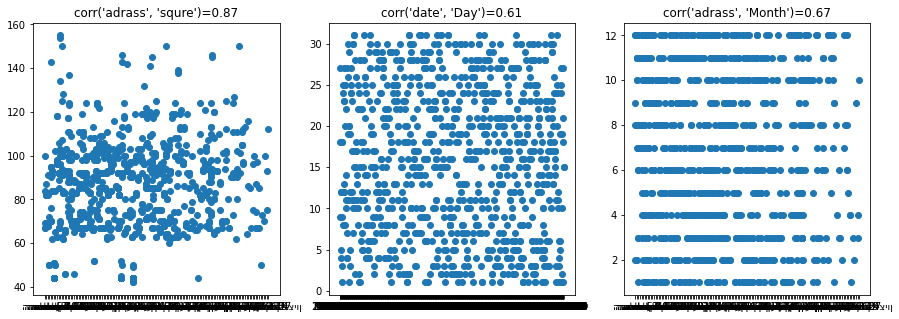

In [6]:
correlations , tuple_arr = get_highly_correlated_cols(Ashelim)
plot_high_correlated_scatters(Ashelim)

Text(0.5, 1.0, 'Nahalat Yehuda')

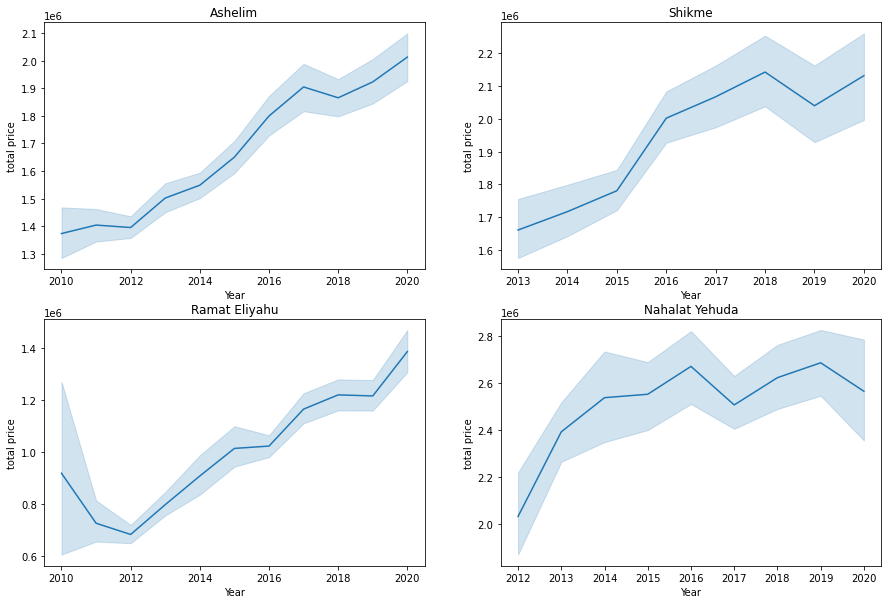

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))#, sharey=True)


sns.lineplot(ax=axes[0][0], x= Ashelim['Year'], y = Ashelim['total price'])
axes[0][0].set_title('Ashelim')


sns.lineplot(ax=axes[0][1], x = Shikme['Year'], y = Shikme['total price'])
axes[0][1].set_title('Shikme')


sns.lineplot(ax=axes[1][0], x = Ramat_Eliyahu['Year'], y = Ramat_Eliyahu['total price'])
axes[1][0].set_title('Ramat Eliyahu')


sns.lineplot(ax=axes[1][1], x=Nahalat_Yehuda['Year'], y = Nahalat_Yehuda['total price'])
axes[1][1].set_title('Nahalat Yehuda')

In [42]:
Ashelim = Ashelim.rename(columns={"adrass": "Address","squre":"Square meters","price for meter":"Price for meter",
                                          "num of rooms":"Number of rooms","flor":"Floor","year build":"Year build","total price":"Total price"})


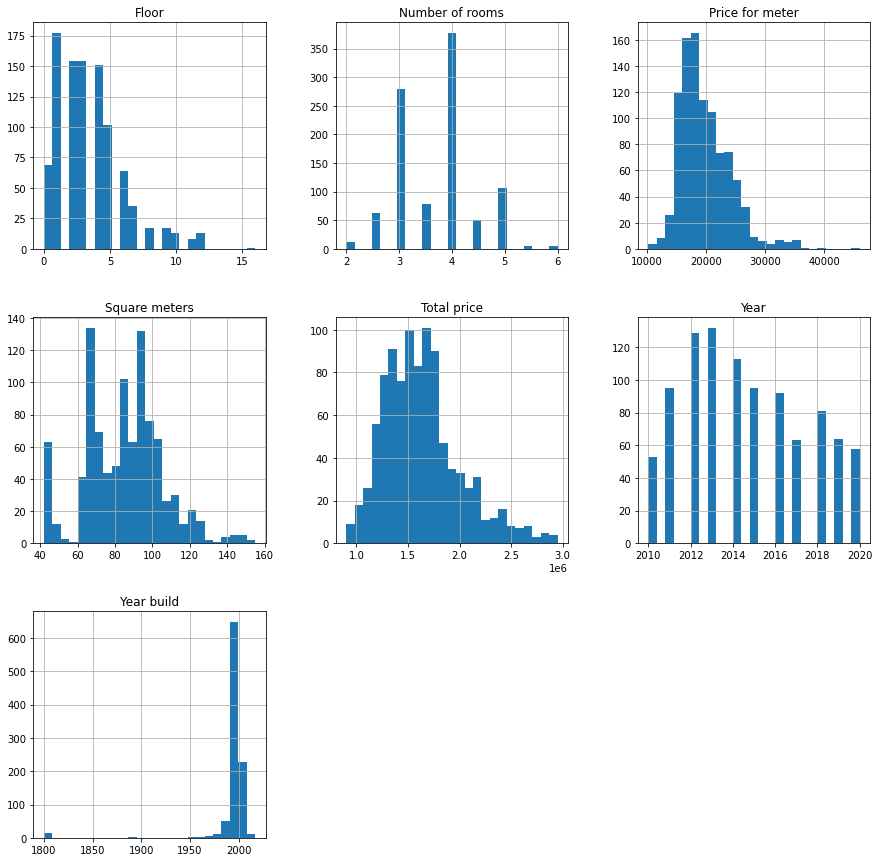

In [43]:
list_Ashelim = Ashelim.hist(bins=25, layout=(3,3), figsize=(15,15),column =['Square meters','Price for meter','Number of rooms','Floor','Year build','Year','Total price'])


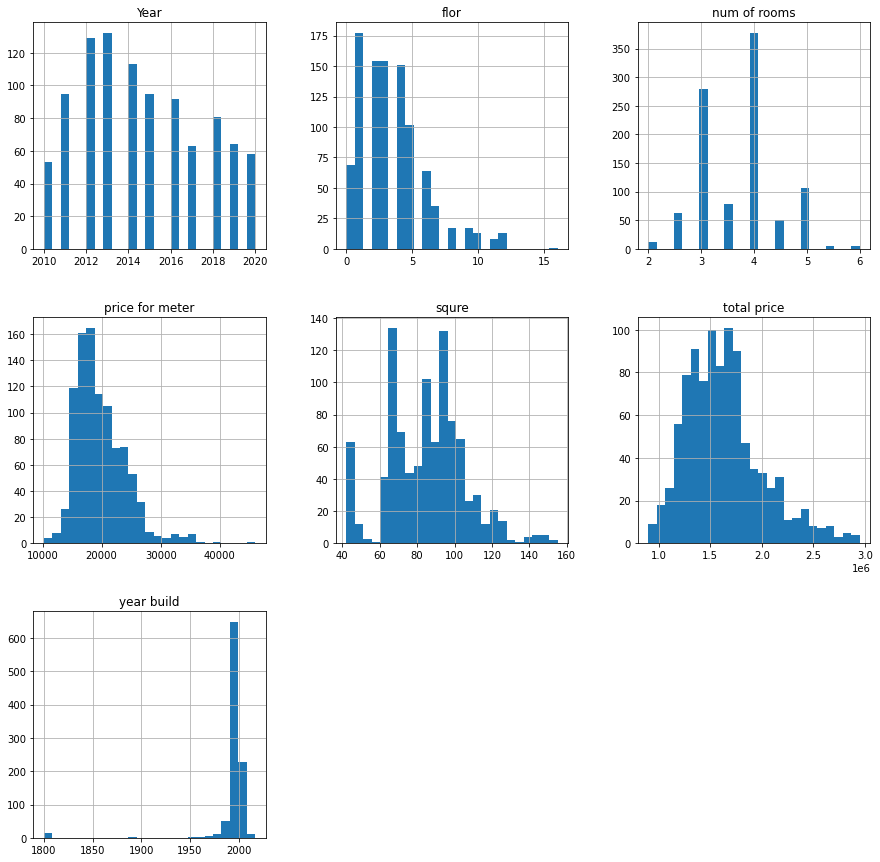

In [33]:
list_Nahalat_Yehuda = Ashelim.hist(bins=25, layout=(3,3), figsize=(15,15),column =['squre','price for meter','num of rooms','flor','year build','Year','total price'])



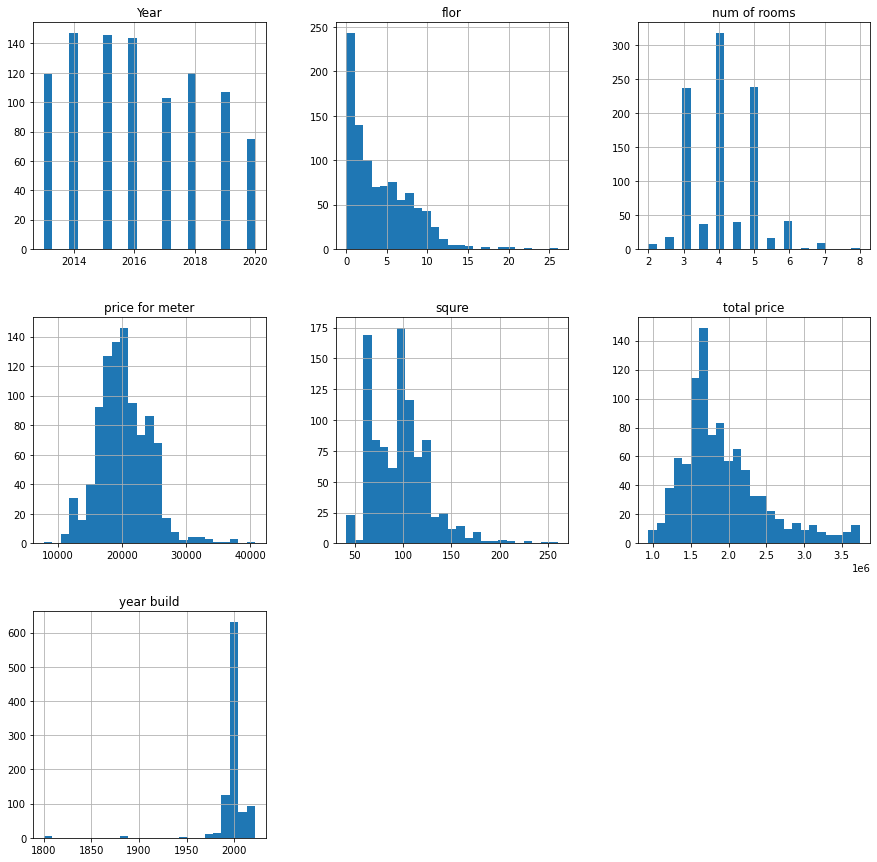

In [34]:
list_Shikme = Shikme.hist(bins=25, layout=(3,3), figsize=(15,15),column =['squre','price for meter','num of rooms','flor','year build','Year','total price'])


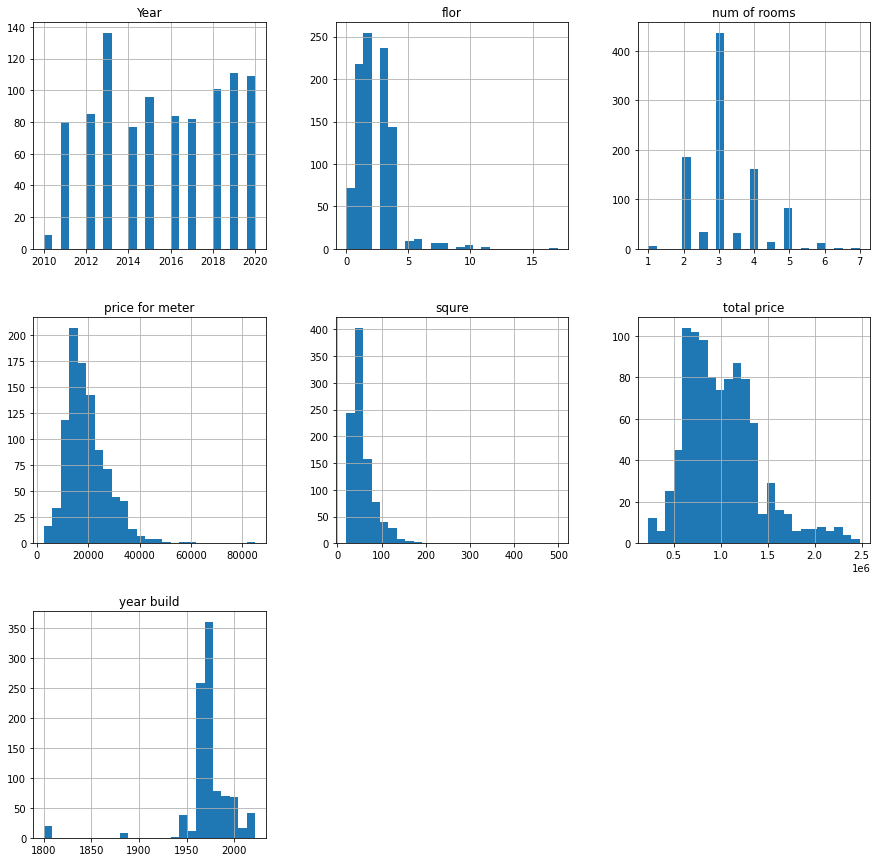

In [35]:
list_Ramat_Eliyahu = Ramat_Eliyahu.hist(bins=25, layout=(3,3), figsize=(15,15),column =['squre','price for meter','num of rooms','flor','year build','Year','total price'])



## EDA - info about neighborhoods

In [7]:
names_neighborhoods = ['Ashelim','Shikme','Ramat Eliyahu','Nahalat Yehuda']

In [12]:
info_neighborhoods

,Average_rent,School_grade,Socio_economic,Cleanliness_Maintenance,Kindergarten,Parking,Public_Transport,Feeling_confident,Gardens,Recreation_and_leisure,Shopping,Pedestrian_comfort
0,5800,7.5,6.0,8.8,9.4,8.4,8.0,9.4,9.4,6.2,7.0,8.6
1,5800,6.5,6.0,9.0,9.0,7.6,8.2,8.8,9.8,9.2,9.2,9.2
2,3500,6.8,3.0,4.6,5.2,5.8,6.8,5.8,5.6,4.8,6.2,6.8
3,6700,5.5,4.0,8.6,9.2,6.8,6.4,9.2,8.6,7.0,5.8,8.0


Text(0.5, 0.98, 'Average rent')

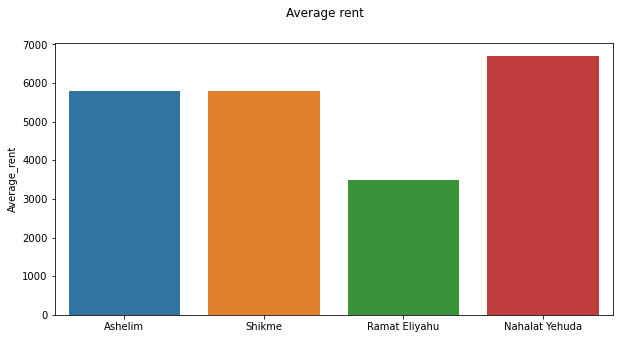

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5), sharey=True)
sns.barplot(x=names_neighborhoods, y=info_neighborhoods['Average_rent'])
fig.suptitle('Average rent')


Text(0.5, 1.0, 'School grade')

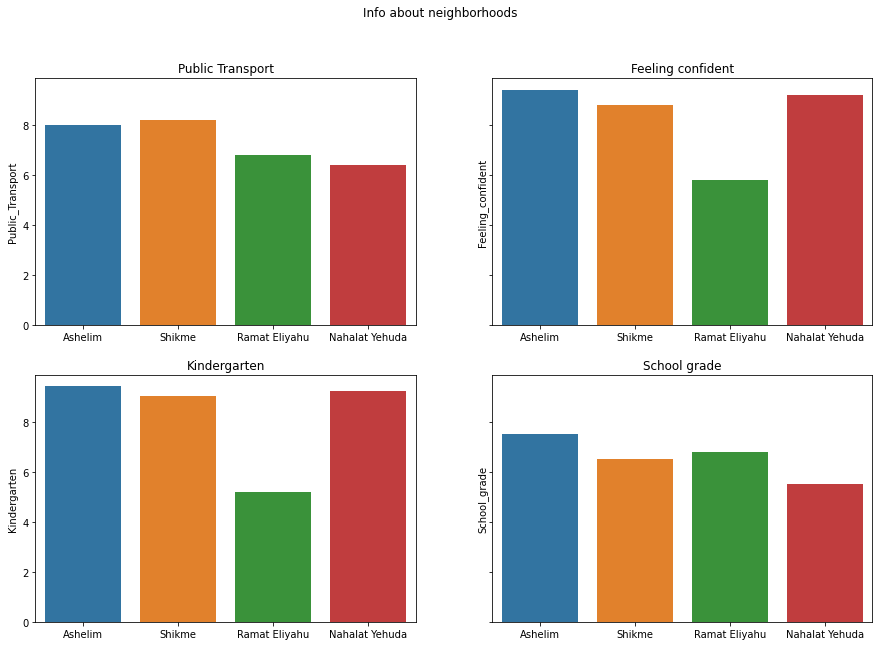

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Info about neighborhoods')

sns.barplot(ax=axes[0][0], x=names_neighborhoods, y=info_neighborhoods['Public_Transport'])
axes[0][0].set_title('Public Transport')

sns.barplot(ax=axes[0][1], x=names_neighborhoods, y=info_neighborhoods['Feeling_confident'])
axes[0][1].set_title('Feeling confident')


sns.barplot(ax=axes[1][0], x=names_neighborhoods, y=info_neighborhoods['Kindergarten'])
axes[1][0].set_title('Kindergarten')

sns.barplot(ax=axes[1][1], x=names_neighborhoods, y=info_neighborhoods['School_grade'])
axes[1][1].set_title('School grade')
